In this notebook we will make a multiregression to evaluate the impacts of the parameters on the democratic score.
We will define 4 groups of political regime and draw box plots for each parameter.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# read our data and creates a data frame
DF = pd.read_csv('DATA/Democracy-Index.csv', usecols=range(1,11))

In [17]:
# an orverviews of the data frame
DF

,Country,Democracy,Expectancy,PopulationD,Gini,AgeMed,Skyscraper,Children,PressF,Overall score
0,Afghanistan,0,64.1,58.3,36.8,18.4,75.0,4.18,36.55,2.85
1,Albania,0,78.5,105.0,29.0,36.4,91.0,1.70,29.84,5.89
2,Algeria,0,78.1,18.1,27.6,28.5,270.0,2.59,45.75,4.01
3,Angola,0,65.0,25.5,42.6,16.7,145.0,5.48,34.96,3.72
4,Argentina,1,77.0,16.4,42.4,31.5,235.0,2.25,28.30,7.02
...,...,...,...,...,...,...,...,...,...,...
159,Venezuela,0,75.1,32.3,46.9,29.6,262.5,2.25,49.10,2.88
160,Vietnam,0,74.7,311.0,35.3,32.5,461.2,1.94,74.93,3.08
161,Yemen,0,68.1,55.2,36.7,20.2,100.0,3.69,61.66,1.95
162,Zambia,0,64.0,24.0,57.1,17.6,90.0,4.81,36.38,5.09


In [18]:
scale = StandardScaler()

# parameters
X = DF[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']]
# target
y = DF['Overall score']

# scale the data for the result to be easily interpreted
X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']] = scale.fit_transform(X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']].values)

#print (X)

# uses ordinary least squares method to compare the parameters' influence.
est = sm.OLS(y, X).fit()

est.summary()

<ipython-input-18-761ba9b9e066>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']] = scale.fit_transform(X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']].values)
/home/vinz/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/vinz/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A val

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Overall score   R-squared (uncentered):                   0.114
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              2.891
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                     0.00721
Time:                        17:01:24   Log-Likelihood:                         -513.67
No. Observations:                 164   AIC:                                      1041.
Df Residuals:                     157   BIC:                                      1063.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Expectancy      0.4614      0.838      0.551      0.583      -1.193       2.116
PopulationD    -0.0193      0.470     -0.041      0.967      -0.948       0.909
Gini            0.0990      0.539      0.184      0.855      -0.966       1.164
AgeMed          0.2048      1.177      0.174      0.862      -2.120       2.530
Skyscraper      0.0413      0.526      0.078      0.938      -0.997       1.080
Children       -0.2990      1.038     -0.288      0.774      -2.350       1.752
PressF         -1.5592      0.525     -2.971      0.003      -2.596      -0.523
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.393
Skew:                          -0.117   Prob(JB):                        0.821
Kurtosis:                       3.057   Cond. No.                         6.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to this multi regression, the press freedom (PressF) is the most important parameter to predict the regime of a country. Following by the age expectancy and the median age. 

In [32]:
# groups country according to their democratic score (the Economist criteria):
# 1 : full democratie 8 =< score < 10
# 2 : flawed democracy 6 =< score < 8
# 3 : hybrid regime 4 =< score < 6
# 4 : authoritarian regime 0 =< score < 4
conditions = [
      DF['Overall score'] >= 8,
      (DF['Overall score'] >= 6) & (DF['Overall score'] < 8),
      (DF['Overall score'] >= 4) & (DF['Overall score'] < 6),
      DF['Overall score'] < 4
      ]
values = [1, 2, 3, 4]
DF['Regime']=np.select(conditions,values)

# save this regime groups in the cvs file for later
DF.to_csv('DATA/democracy_regime')



Draw box plot for each parameter and each group of political regime:
    1 : full democratie 
    2 : flawed democracy 
    3 : hybrid regime
    4 : authoritarian regime   

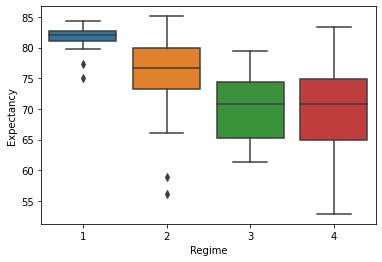

In [24]:
box = sns.boxplot(x='Regime', y='Expectancy', data=DF)

The more democratic a country is, the higher the life expectancy is. Nevertheless we can observe a wilde range in authoritarian countries.

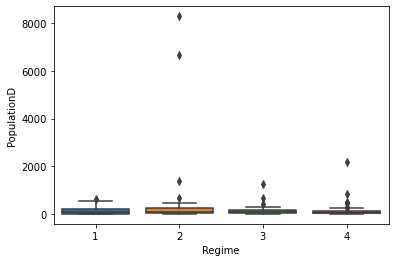

In [25]:
box = sns.boxplot(x='Regime', y='PopulationD', data=DF)

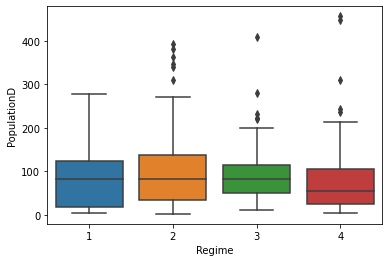

In [26]:
df_filtered = DF.copy()
df_filtered= df_filtered.loc[df_filtered['PopulationD']<df_filtered['PopulationD'].quantile(0.925)]
box = sns.boxplot(x='Regime', y='PopulationD', data=df_filtered)

Density of population in a country does not seem to be related with the political regime.

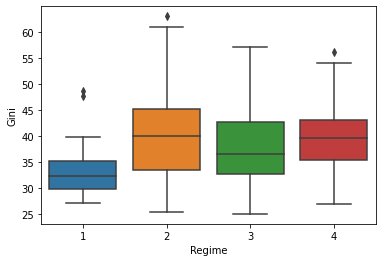

In [27]:
box = sns.boxplot(x='Regime', y='Gini', data=DF)

Democratic countries have, in mean, less wealth inequality than others. Nevertheless we can observe a wilde range in others countries.

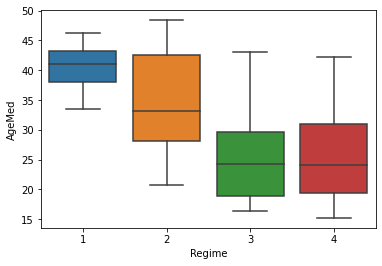

In [28]:
box = sns.boxplot(x='Regime', y='AgeMed', data=DF)

People are younger in dictatorship than in democracy.

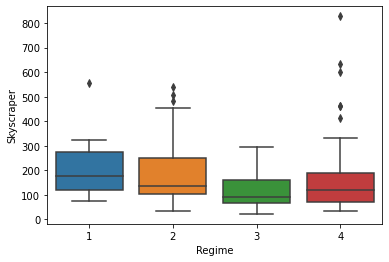

In [29]:
box = sns.boxplot(x='Regime', y='Skyscraper', data=DF)

The highest building in the world are in authoritarian countries, but the mean of height is higher in democracy.

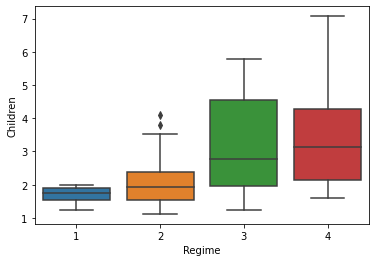

In [30]:
box = sns.boxplot(x='Regime', y='Children', data=DF)

The more democratic a country is, the less women have children. Nevertheless we can observe a wilde range in authoritarian countries.

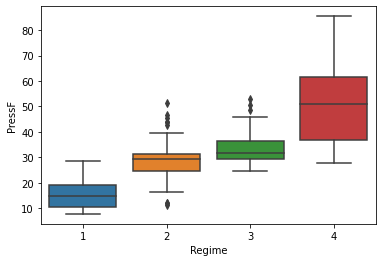

In [31]:
box = sns.boxplot(x='Regime', y='PressF', data=DF)

The more democratic a country is, the better the press freedom is (the freedom press score is low when the press is free, and high when is not).